In [1]:
# Juan Pardo Palazón

# Importacion de librerias
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
import os

In [2]:
# Constantes
RUTA_ACTUAL = os.path.dirname(os.path.realpath('__file__'))
DIRECTORIO_GUARDADO_IMG = 'IMG_GRAPH'

In [3]:
# Configurar tamaño del gráfico y fuente inicial
pyplot.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
pyplot.rcParams['font.size'] = 10

In [4]:
def showGraph(dataset, fichero, numero_hogar):
    """Muestra el gráfico de la gráfica y se guarda
    la misma en un fichero png.
     
    Argumentos:
    dataset -- datos a dibujar en la gráfica
    fichero -- nombre del fichero a leer (sin el numero de hogar)
    numero_hogar -- numero de hogar a tratar
    """
    # Genera el gráfico y se establecen los ejes
    grafico_interpolado = dataset.interpolate(method='spline', order=2)
    plot = grafico_interpolado.plot()
    
    # Configurando la gráfica y mostrar el grafico
    plt.title('Consumo semanal por rango horario (Sin Rolling). Hogar ' + numero_hogar, fontsize = 16)
    plt.xlabel('Semanas', fontsize = 14)
    plt.ylabel('Consumo de energía', fontsize = 14)
    plt.show()
    
    # Se recoge la gráfica y se guarda en un fichero png
    fichero = os.path.join(RUTA_ACTUAL, DIRECTORIO_GUARDADO_IMG, fichero + '.png')
    figura = plot.get_figure()
    figura.savefig(fichero)

In [5]:
def leerFicheroYDibujarGrafica(fichero, numero_hogar):
    """Lee el fichero con los datos transformados
     
    Argumentos:
    fichero -- nombre del fichero a leer
    numero_hogar -- numero de hogar a tratar
    """
    dataset = read_csv(fichero + '.csv', header=0, infer_datetime_format=True, index_col=['Time'])
    showGraph(dataset, fichero, numero_hogar)

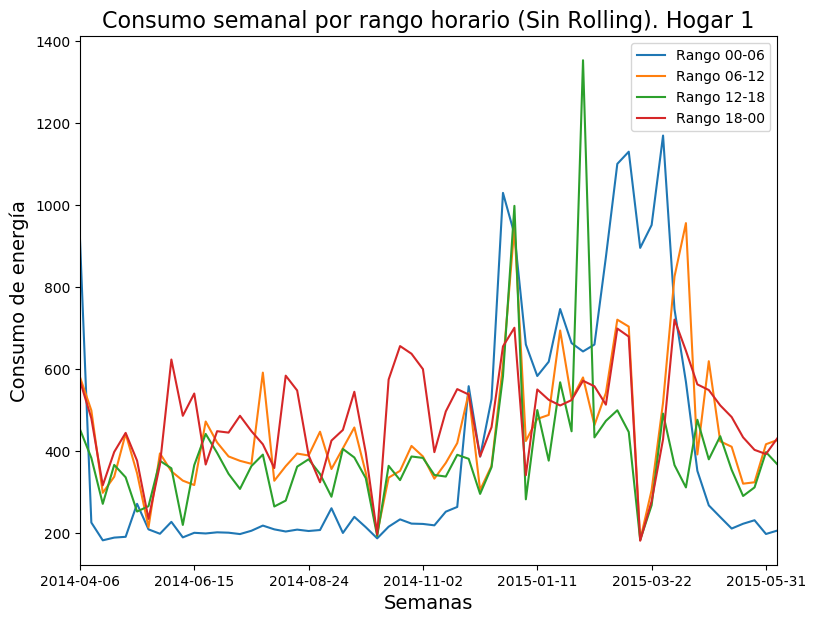

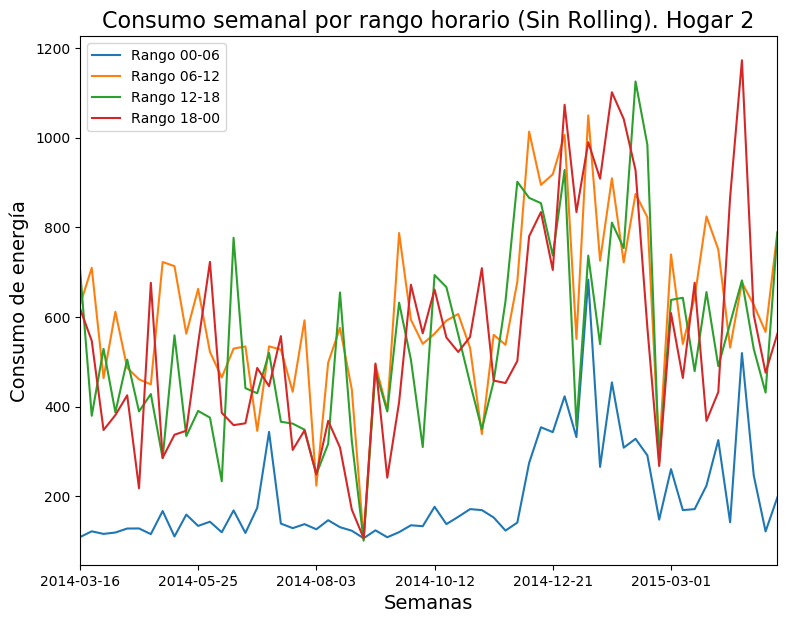

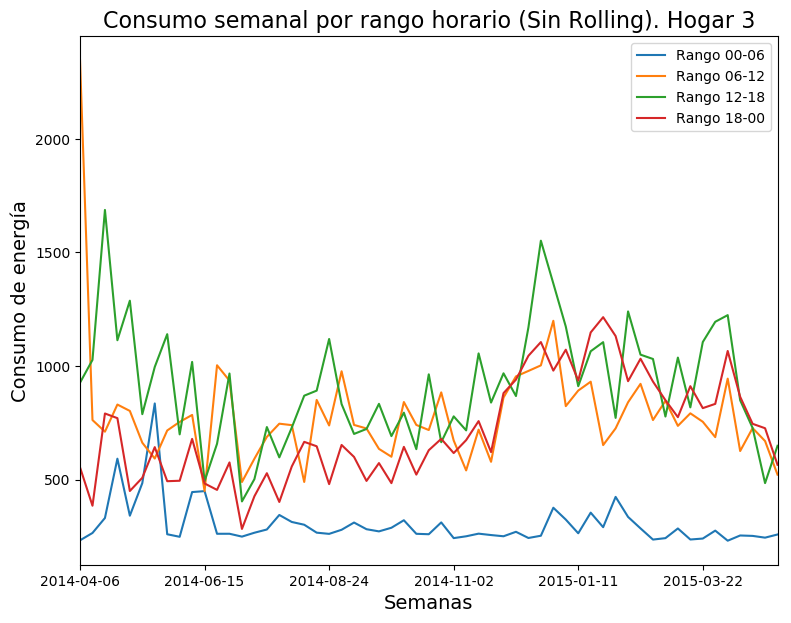

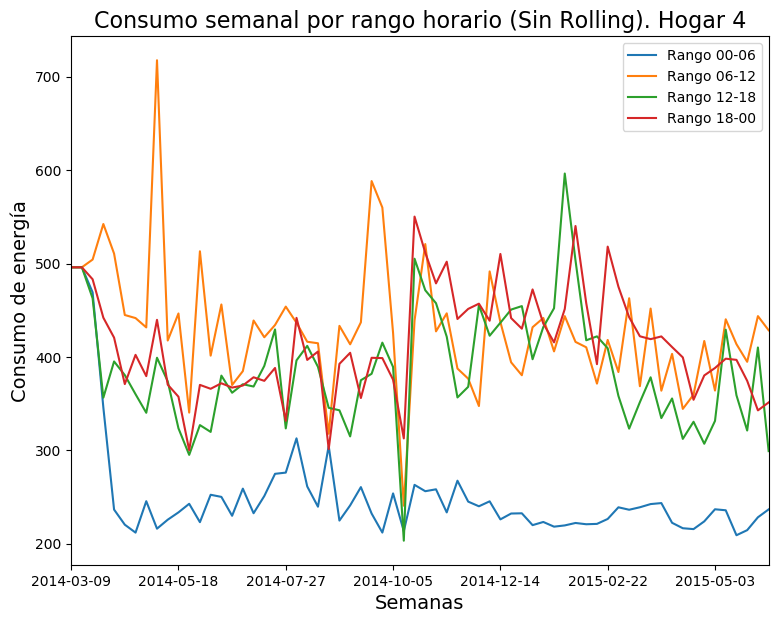

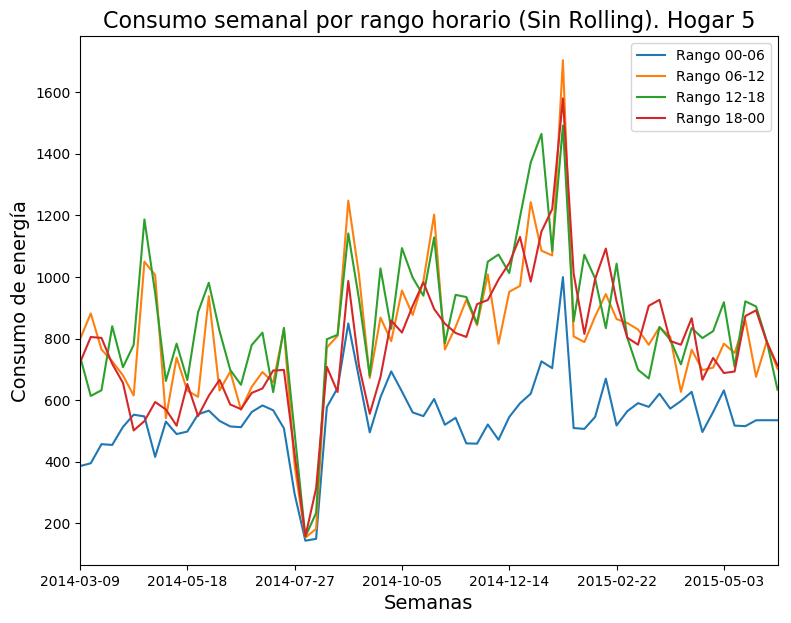

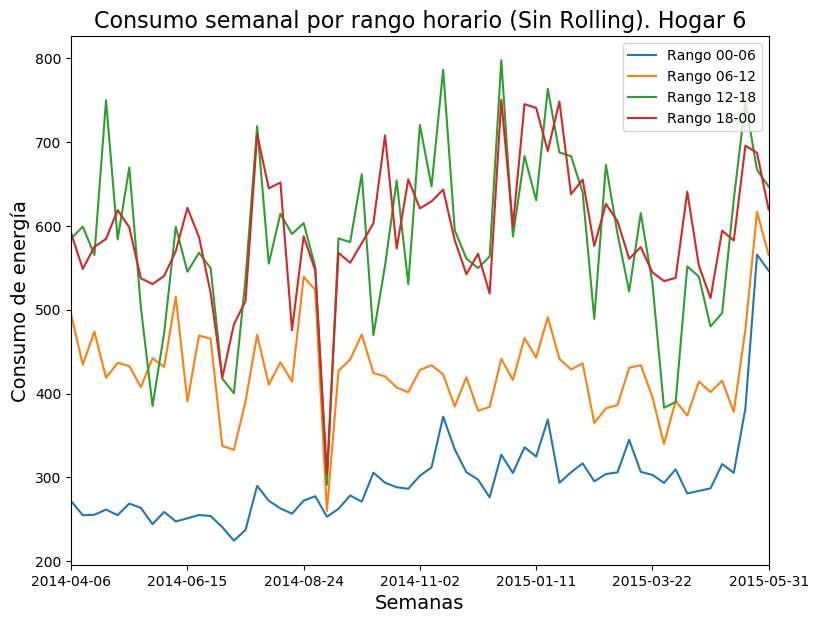

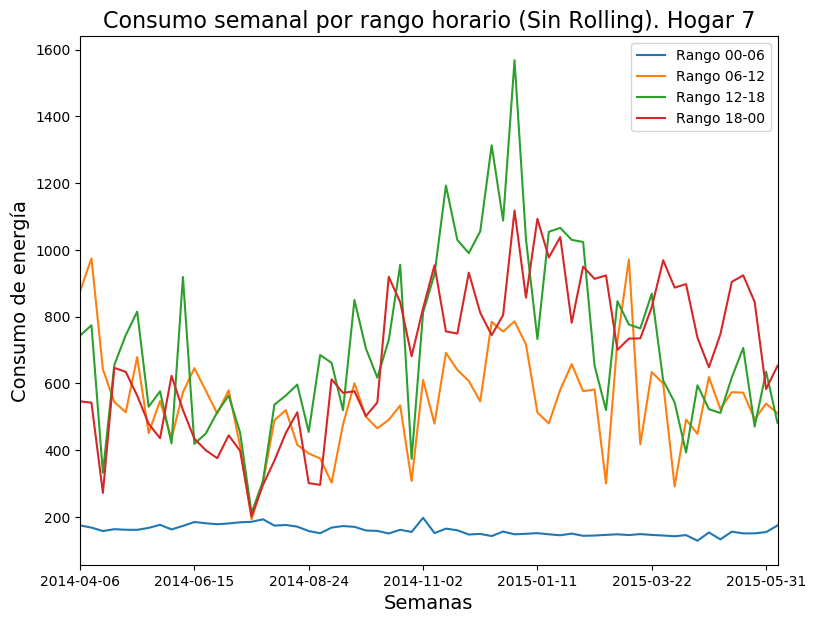

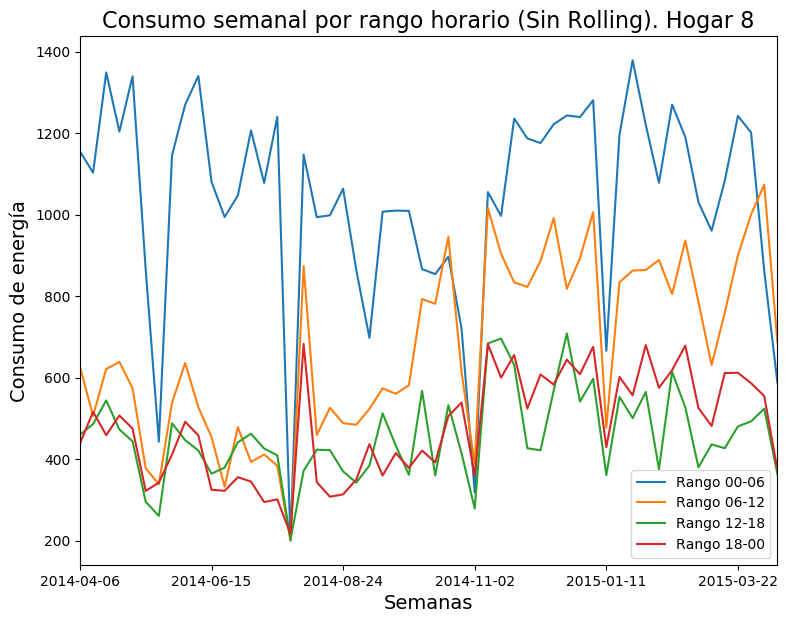

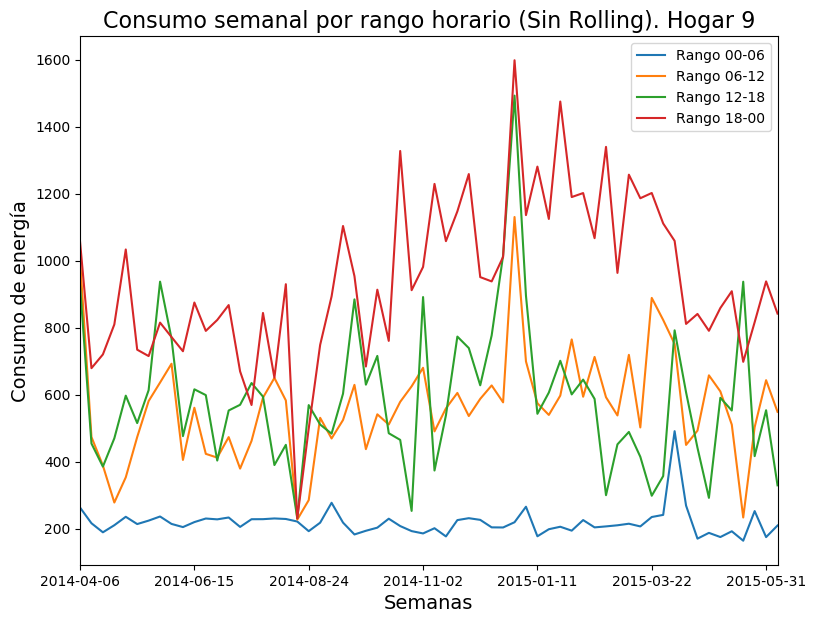

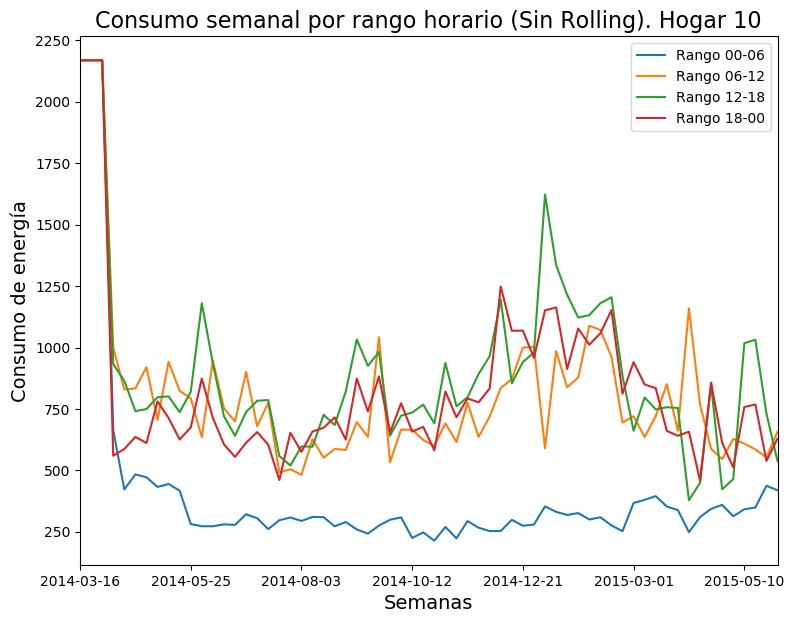

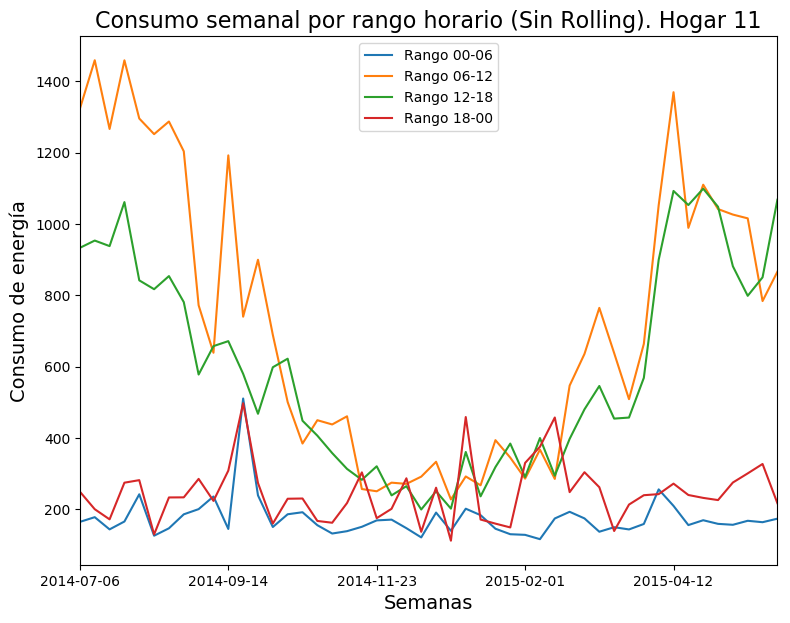

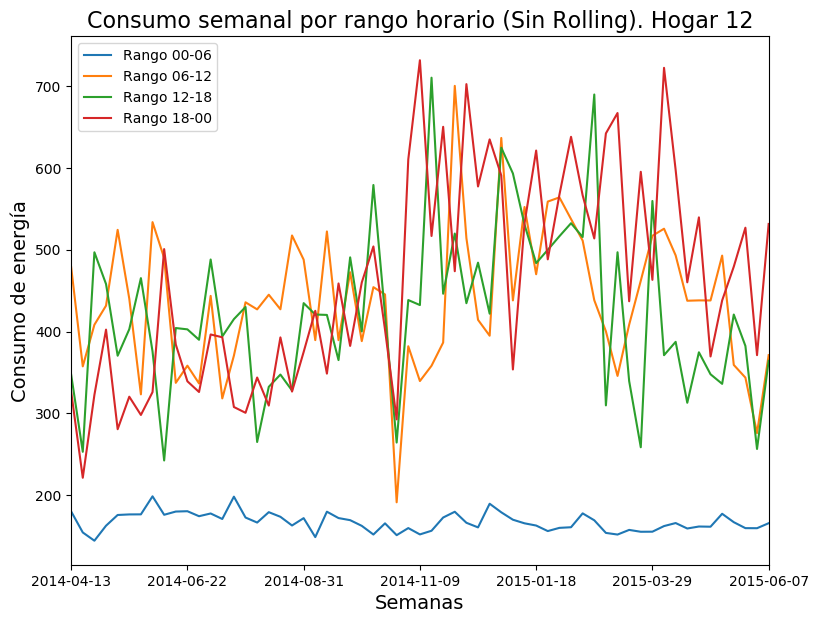

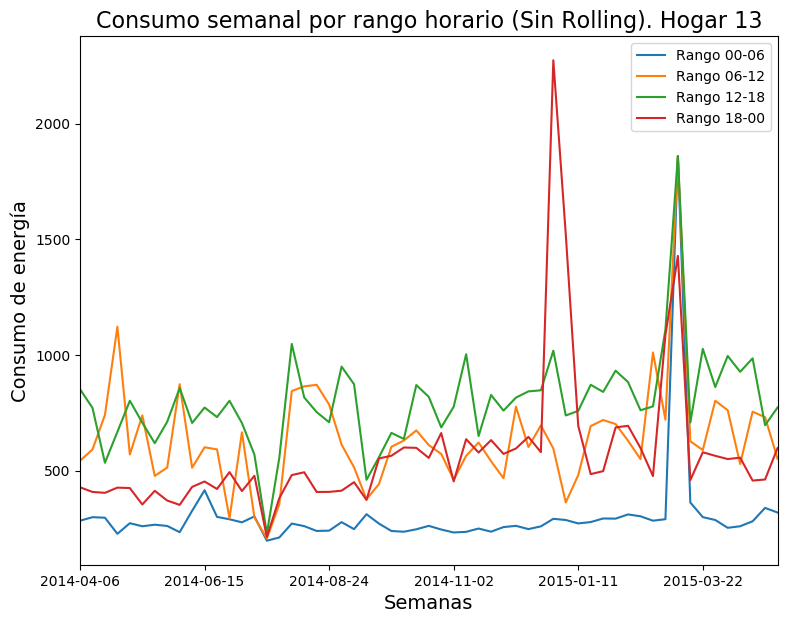

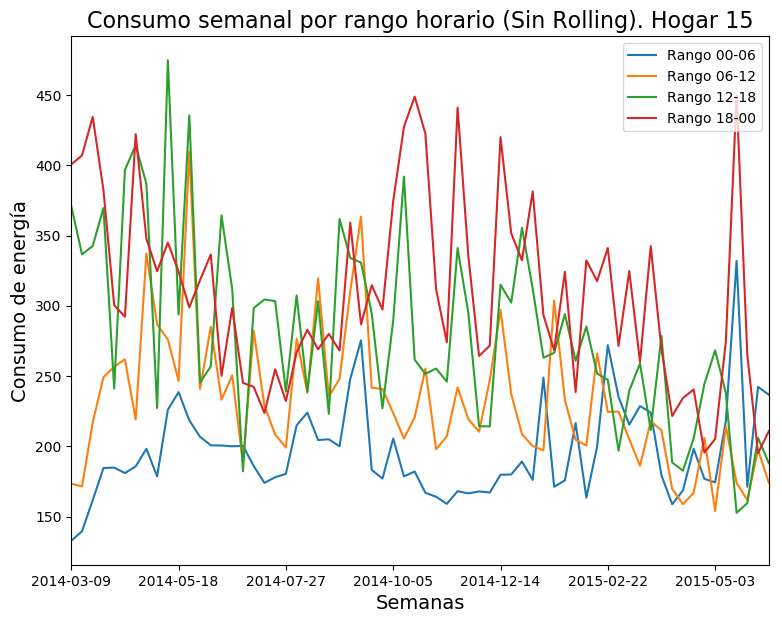

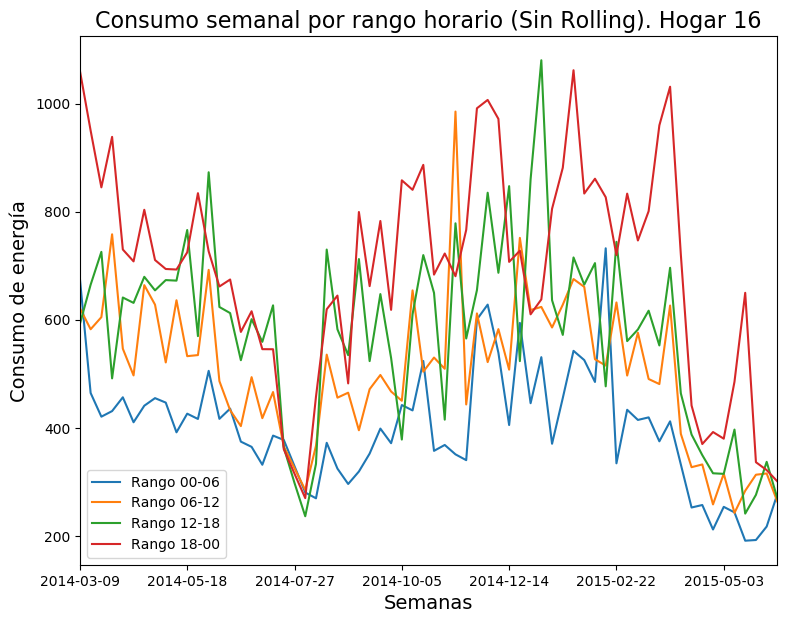

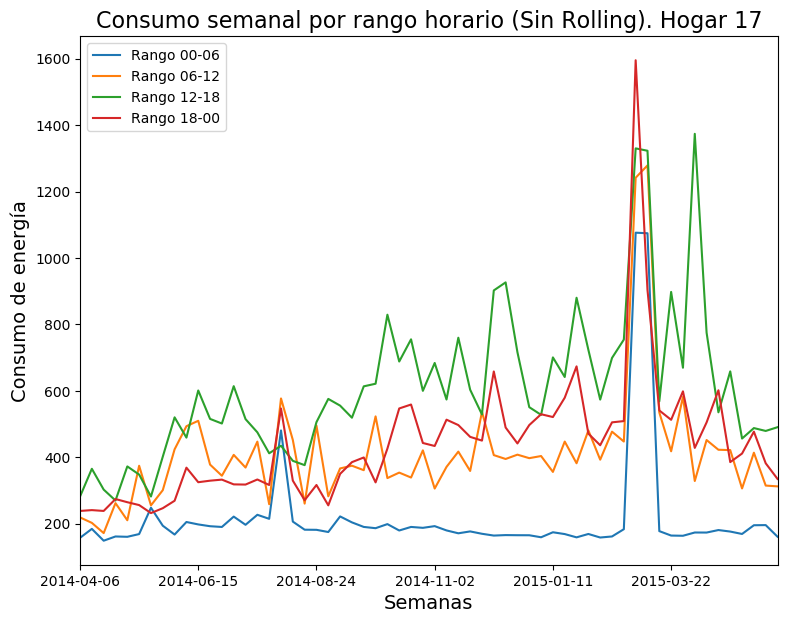

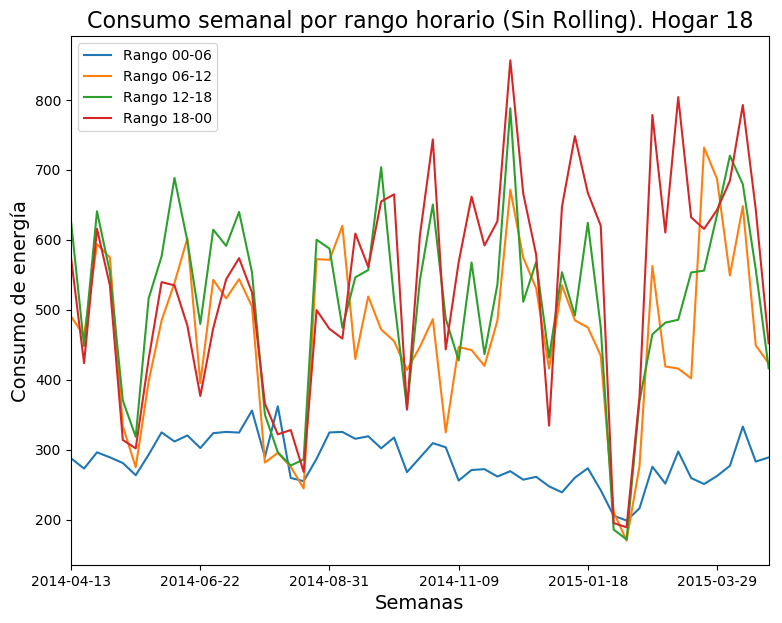

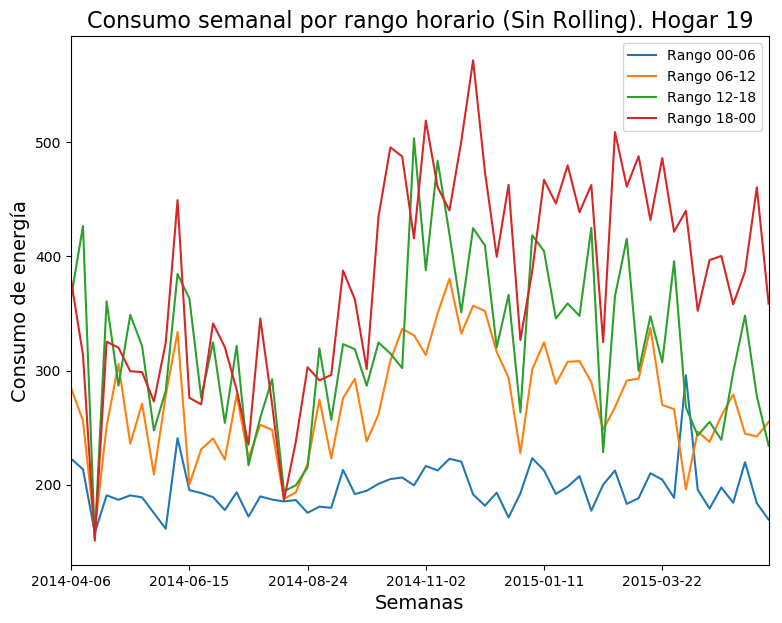

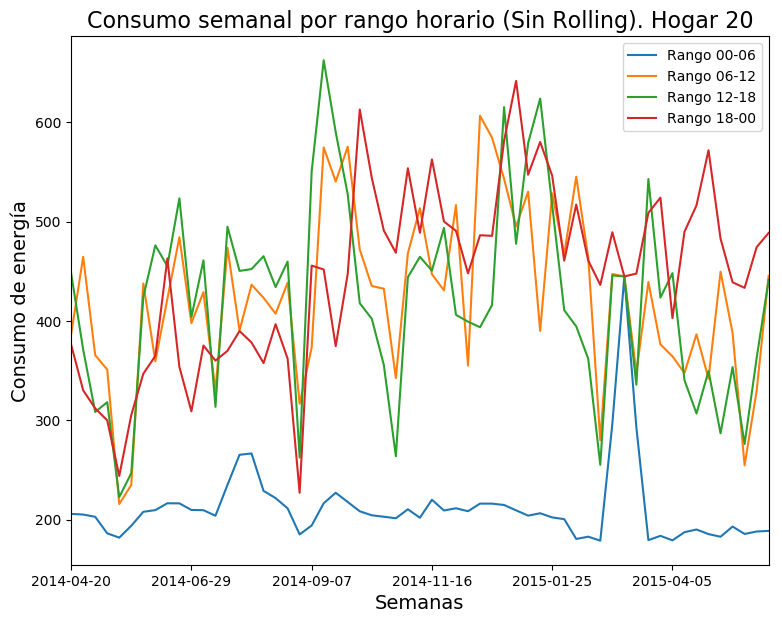

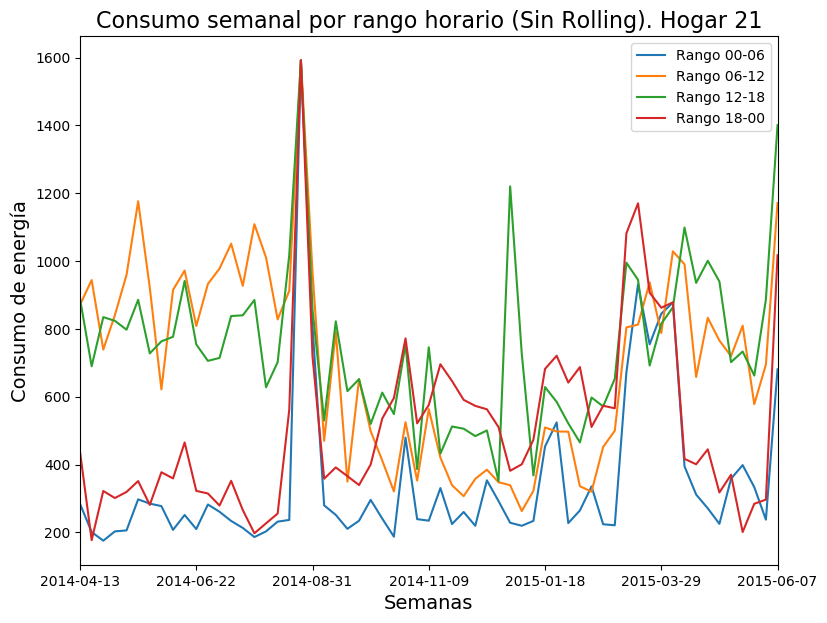

In [6]:
# Generar las gráficas
for num_hogar in range(1, 22):
    if num_hogar != 14:
        leerFicheroYDibujarGrafica('Hogar_' + str(num_hogar) + '_filtro_semanal_rango_NR', str(num_hogar))